<a href="https://colab.research.google.com/github/Raffa-Silva/Testes-treinamento-de-redes/blob/main/Teste_TCN_90_2020_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste realizado com dados somente desde 2020 para o treinamento, e validação em 2021 utilizando 90 dias de previsão com a rede TCN.
Porém neste caso utilizei a média movel de 14 dias para suavizar os picos dos dados.


In [ ]:
# Importações necessárias
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import chardet #biblioteca usada para detectar a codificação (encoding) de um conjunto de bytes

#Montando a partição do Google Drive
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/Doutorado/Dados-covid-estado.csv'
file_path2 = '/content/drive/MyDrive/Doutorado/leitos-e-internacoes.csv'

rawdata = open(file_path1, "rb").read()
result = chardet.detect(rawdata)
encoding = result['encoding']

rawdata2 = open(file_path2, "rb").read()
result2 = chardet.detect(rawdata2)
encoding2 = result2['encoding']

#Abrindo um arquivo (tabular) do tipo csv
df_covid_estado = pd.read_csv(file_path1, delimiter=";", encoding=encoding)
df_covid_hospitalizados = pd.read_csv(file_path2, delimiter=";", encoding=encoding)

print('Conjunto de dados de Covid-19 no estado de SP:')
print(df_covid_estado)

print('Conjunto de dados de hospitalizados de Covid-19 no estado de SP:')
print(df_covid_hospitalizados)


Mounted at /content/drive
Conjunto de dados de Covid-19 no estado de SP:
            Data    Casos  Casos por dia  Óbitos por dia
0     26/02/2020        1              1               0
1     27/02/2020        0              0               0
2     28/02/2020        0              0               0
3     29/02/2020        2              1               0
4     01/03/2020        0              0               0
...          ...      ...            ...             ...
1192  02/06/2023  6618980            795              22
1193  03/06/2023  6618980              0               0
1194  04/06/2023  6619871            891              11
1195  05/06/2023  6619936             65               6
1196  06/06/2023  6621112           1176              25

[1197 rows x 4 columns]
Conjunto de dados de hospitalizados de Covid-19 no estado de SP:
             Data                        nome_drs ocupacao_leitos  \
0      08/10/2020        DRS 01 Grande SÃ£o Paulo           42,17   
1      08/10/20

In [ ]:

# Verificar valores ausentes após a remoção
valores_ausentes_casos = df_covid_estado.isna().sum()
valores_ausentes_hosp = df_covid_hospitalizados.isna().sum()

# Exibir os valores ausentes por coluna após a remoção
print(valores_ausentes_casos)
print(valores_ausentes_hosp)

Data              0
Casos             0
Casos por dia     0
Óbitos por dia    0
dtype: int64
Data                           0
nome_drs                       0
ocupacao_leitos               18
pacientes_uti_ultimo_dia      18
total_covid_uti_ultimo_dia    18
ocupacao_leitos_ultimo_dia    18
internacoes_ultimo_dia        18
pacientes_enf_ultimo_dia      18
total_covid_enf_ultimo_dia    18
dtype: int64


In [ ]:
# Verificar quais linhas contêm valores ausentes no DataFrame df_covid_hospitalizados
linhas_com_nan = df_covid_hospitalizados[df_covid_hospitalizados.isnull().any(axis=1)]

# Exibir as linhas com valores ausentes
print(linhas_com_nan)


             Data                        nome_drs ocupacao_leitos  \
16596  18/04/2023        DRS 01 Grande SÃ£o Paulo             NaN   
16597  18/04/2023               DRS 02 AraÃ§atuba             NaN   
16598  18/04/2023               DRS 03 Araraquara             NaN   
16599  18/04/2023         DRS 04 Baixada Santista             NaN   
16600  18/04/2023                 DRS 05 Barretos             NaN   
16601  18/04/2023                    DRS 06 Bauru             NaN   
16602  18/04/2023                 DRS 07 Campinas             NaN   
16603  18/04/2023                   DRS 08 Franca             NaN   
16604  18/04/2023                 DRS 09 MarÃ­lia             NaN   
16605  18/04/2023               DRS 10 Piracicaba             NaN   
16606  18/04/2023      DRS 11 Presidente Prudente             NaN   
16607  18/04/2023                 DRS 12 Registro             NaN   
16608  18/04/2023          DRS 13 RibeirÃ£o Preto             NaN   
16609  18/04/2023  DRS 14 SÃ£o JoÃ

In [ ]:
#preencher os valores NaN
coluna_alvo1 = 'ocupacao_leitos'
coluna_alvo2 = 'pacientes_uti_ultimo_dia'
coluna_alvo3 = 'total_covid_uti_ultimo_dia'
coluna_alvo4 = 'ocupacao_leitos_ultimo_dia'
coluna_alvo5 = 'internacoes_ultimo_dia'
coluna_alvo6 = 'pacientes_enf_ultimo_dia'
coluna_alvo7 = 'total_covid_enf_ultimo_dia'

df_covid_hospitalizados[coluna_alvo1] = pd.to_numeric(df_covid_hospitalizados[coluna_alvo1], errors='coerce') # Converter a coluna para números (ignorando erros para manter as strings como NaN)
df_covid_hospitalizados[coluna_alvo1].fillna(df_covid_hospitalizados[coluna_alvo1].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo2].fillna(df_covid_hospitalizados[coluna_alvo2].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo3].fillna(df_covid_hospitalizados[coluna_alvo3].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo4] = pd.to_numeric(df_covid_hospitalizados[coluna_alvo4], errors='coerce') # Converter a coluna para números (ignorando erros para manter as strings como NaN)
df_covid_hospitalizados[coluna_alvo4].fillna(df_covid_hospitalizados[coluna_alvo4].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo5].fillna(df_covid_hospitalizados[coluna_alvo5].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo6].fillna(df_covid_hospitalizados[coluna_alvo6].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo7].fillna(df_covid_hospitalizados[coluna_alvo7].mean(), inplace=True)


In [ ]:
# Verificar valores ausentes após a remoção
valores_ausentes_casos = df_covid_estado.isna().sum()
valores_ausentes_hosp = df_covid_hospitalizados.isna().sum()

# Exibir os valores ausentes por coluna após a remoção
print(valores_ausentes_casos)
print(valores_ausentes_hosp)


Data              0
Casos             0
Casos por dia     0
Óbitos por dia    0
dtype: int64
Data                          0
nome_drs                      0
ocupacao_leitos               0
pacientes_uti_ultimo_dia      0
total_covid_uti_ultimo_dia    0
ocupacao_leitos_ultimo_dia    0
internacoes_ultimo_dia        0
pacientes_enf_ultimo_dia      0
total_covid_enf_ultimo_dia    0
dtype: int64


<ipython-input-7-7836ae5d9423>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_covid_estado['Data'] = pd.to_datetime(df_covid_estado['Data'])


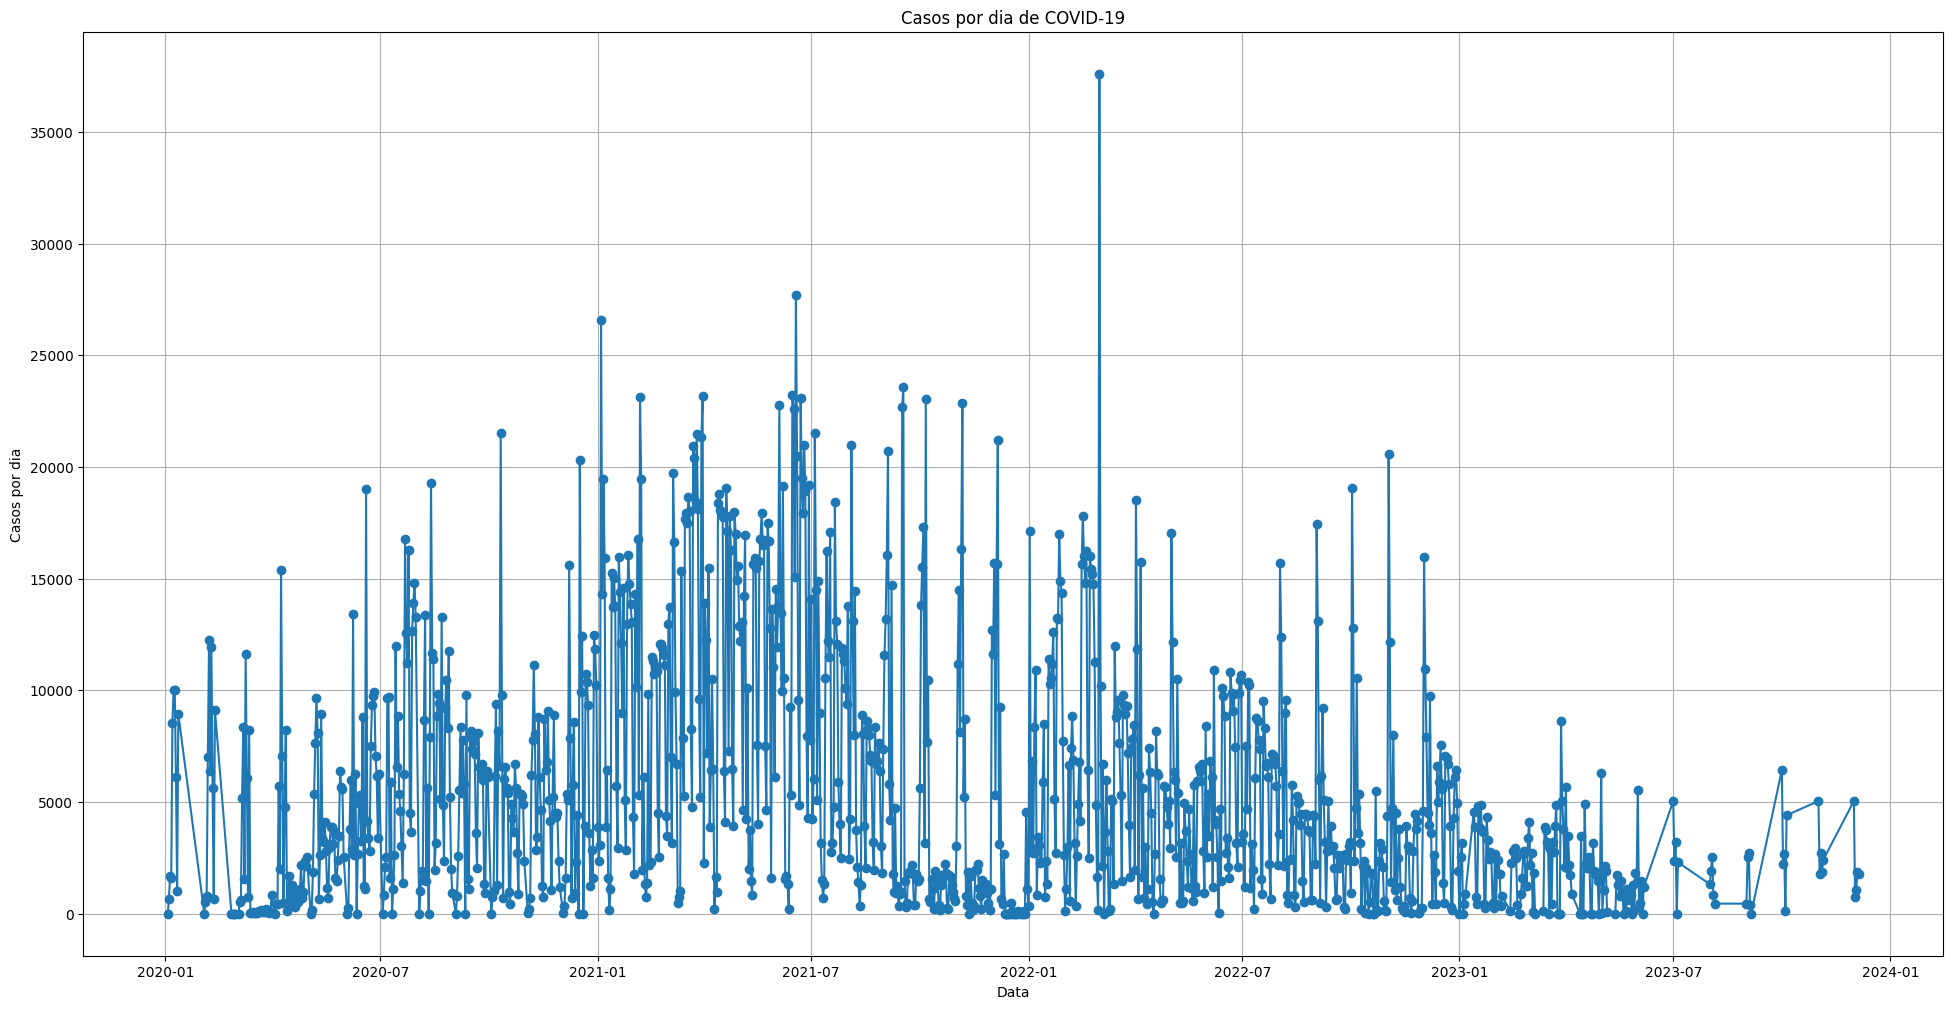

In [ ]:
df_covid_estado['Data'] = pd.to_datetime(df_covid_estado['Data'])

# Ordenar DataFrame pela coluna 'Data'
df_covid_estado = df_covid_estado.sort_values(by='Data')

# Agora, você pode plotar o gráfico
plt.figure(figsize=(24, 12))
plt.plot(df_covid_estado['Data'], df_covid_estado['Casos por dia'], marker='o', linestyle='-')
plt.title('Casos por dia de COVID-19')
plt.xlabel('Data')
plt.ylabel('Casos por dia')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Supondo que 'df_covid_estado' contém as informações do COVID-19
# Certifique-se de que 'Data' está no formato datetime
df_covid_estado['Data'] = pd.to_datetime(df_covid_estado['Data'])

# Ordenar DataFrame pela coluna 'Data'
df_covid_estado = df_covid_estado.sort_values(by='Data')

# Calcular a média móvel dos últimos 7 dias
df_covid_estado['Media Movel 7 dias'] = df_covid_estado['Casos por dia'].rolling(window=7).mean()

# Substituir os valores zero pela média móvel dos últimos 7 dias
df_covid_estado['Casos por dia'] = np.where(df_covid_estado['Casos por dia'] == 0, df_covid_estado['Media Movel 7 dias'], df_covid_estado['Casos por dia'])


In [ ]:
df_covid_estado['Data'] = pd.to_datetime(df_covid_estado['Data'])

# Ordenar DataFrame pela coluna 'Data'
df_covid_estado = df_covid_estado.sort_values(by='Data')

# Agora, você pode plotar o gráfico
plt.figure(figsize=(24, 12))
plt.plot(df_covid_estado['Data'], df_covid_estado['Casos por dia'], marker='o', linestyle='-')
plt.title('Casos por dia de COVID-19')
plt.xlabel('Data')
plt.ylabel('Casos por dia')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Supondo que 'df_covid_estado' contém as informações do COVID-19
# Certifique-se de que 'Data' está no formato datetime
df_covid_estado['Data'] = pd.to_datetime(df_covid_estado['Data'])

# Ordenar DataFrame pela coluna 'Data'
df_covid_estado = df_covid_estado.sort_values(by='Data')

# Calcular a média móvel dos últimos 14 dias
df_covid_estado['Media Movel 14 dias'] = df_covid_estado['Casos por dia'].rolling(window=14).mean()

# Substituir toda a coluna 'Casos por dia' pela média móvel dos últimos 14 dias
df_covid_estado['Casos por dia'] = df_covid_estado['Media Movel 14 dias']

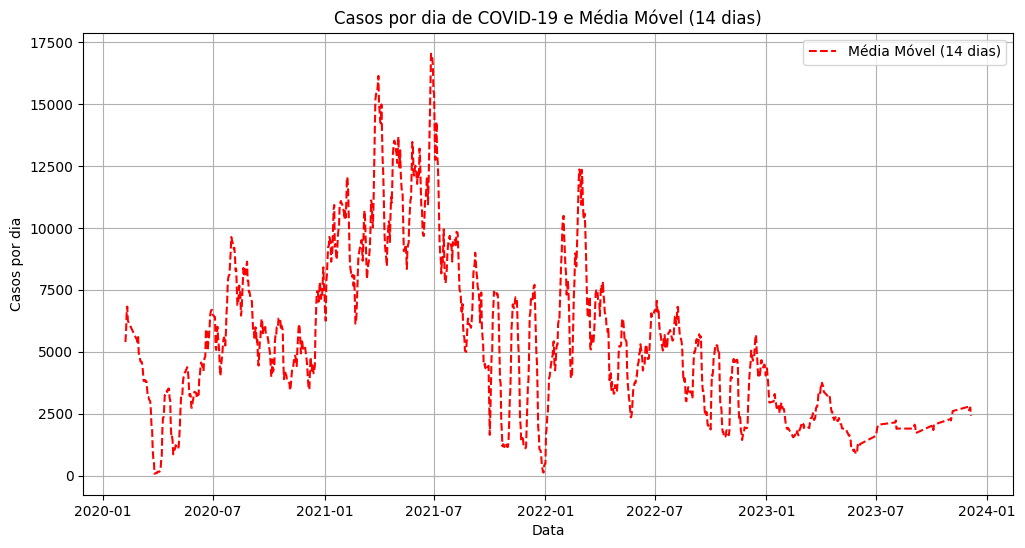

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_covid_estado['Data'], df_covid_estado['Media Movel 14 dias'], label='Média Móvel (14 dias)', color='red', linestyle='--')
plt.title('Casos por dia de COVID-19 e Média Móvel (14 dias)')
plt.xlabel('Data')
plt.ylabel('Casos por dia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Supondo que 'df_covid_estado' e 'df_covid_hospitalizados' contêm as informações do COVID-19
# Certifique-se de que 'Data' está no formato datetime
df_covid_estado['Data'] = pd.to_datetime(df_covid_estado['Data'])
df_covid_hospitalizados['Data'] = pd.to_datetime(df_covid_hospitalizados['Data'])

# Combinando dados
common_column = 'Data'
df_combinados = pd.merge(df_covid_estado, df_covid_hospitalizados, how='inner', on=common_column)

print(df_combinados)


            Data    Casos  Casos por dia  Óbitos por dia  Media Movel 7 dias  \
0     2020-01-11  1117147            NaN              20         5570.428571   
1     2020-01-11  1117147            NaN              20         5570.428571   
2     2020-01-11  1117147            NaN              20         5570.428571   
3     2020-01-11  1117147            NaN              20         5570.428571   
4     2020-01-11  1117147            NaN              20         5570.428571   
...          ...      ...            ...             ...                 ...   
17491 2023-12-05  6600625    2414.571429              27         2118.000000   
17492 2023-12-05  6600625    2414.571429              27         2118.000000   
17493 2023-12-05  6600625    2414.571429              27         2118.000000   
17494 2023-12-05  6600625    2414.571429              27         2118.000000   
17495 2023-12-05  6600625    2414.571429              27         2118.000000   

       Media Movel 14 dias             

<ipython-input-12-4bd255801079>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_covid_hospitalizados['Data'] = pd.to_datetime(df_covid_hospitalizados['Data'])


In [ ]:
print(df_combinados)


            Data    Casos  Casos por dia  Óbitos por dia  Media Movel 7 dias  \
0     2020-01-11  1117147            NaN              20         5570.428571   
1     2020-01-11  1117147            NaN              20         5570.428571   
2     2020-01-11  1117147            NaN              20         5570.428571   
3     2020-01-11  1117147            NaN              20         5570.428571   
4     2020-01-11  1117147            NaN              20         5570.428571   
...          ...      ...            ...             ...                 ...   
17491 2023-12-05  6600625    2414.571429              27         2118.000000   
17492 2023-12-05  6600625    2414.571429              27         2118.000000   
17493 2023-12-05  6600625    2414.571429              27         2118.000000   
17494 2023-12-05  6600625    2414.571429              27         2118.000000   
17495 2023-12-05  6600625    2414.571429              27         2118.000000   

       Media Movel 14 dias             

In [ ]:
#a métrica WMAPE (Weighted Mean Absolute Percentage Error)
# é uma adaptação do erro percentual que resolve o problema de dividir por zero
# vamos considerar que o peso de cada observação é o valor absoluto dela

def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [ ]:

###Selecionando as colunas para o treinamento

#'Data'
#'Casos por dia'
#'Óbitos por dia'
#'total_covid_uti_ultimo_dia'

# Lista de colunas desejadas
colunas_selecionadas = ['Data', 'Casos por dia', 'total_covid_uti_ultimo_dia', 'nome_drs']

# Criar um novo DataFrame apenas com as colunas desejadas
df_combinados2 = df_combinados[colunas_selecionadas]


In [ ]:
print(df_combinados2)

            Data  Casos por dia  total_covid_uti_ultimo_dia  \
0     2020-01-11            NaN                      4098.0   
1     2020-01-11            NaN                       118.0   
2     2020-01-11            NaN                       117.0   
3     2020-01-11            NaN                       377.0   
4     2020-01-11            NaN                        88.0   
...          ...            ...                         ...   
17491 2023-12-05    2414.571429                        22.0   
17492 2023-12-05    2414.571429                        22.0   
17493 2023-12-05    2414.571429                        94.0   
17494 2023-12-05    2414.571429                        71.0   
17495 2023-12-05    2414.571429                      1449.0   

                             nome_drs  
0            DRS 01 Grande SÃ£o Paulo  
1                   DRS 02 AraÃ§atuba  
2                   DRS 03 Araraquara  
3             DRS 04 Baixada Santista  
4                     DRS 05 Barretos  
...

In [ ]:
#converter a coluna para datetime
df_combinados2['Data'] = pd.to_datetime(df_combinados2['Data'], format='%d/%m/%Y')


<ipython-input-17-ecab05470ed3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinados2['Data'] = pd.to_datetime(df_combinados2['Data'], format='%d/%m/%Y')


In [ ]:
#criar variáveis adicionais do dia da semana
#Variáveis específicas da estrutura temporal, como dias da semana, meses e dias do mês
#são importantes para capturar padrões sazonais

weekday = pd.get_dummies(df_combinados2['Data'].dt.weekday)
weekday.columns = ['weekday_' + str(i) for i in range(weekday.shape[1])]

df_combinados2 = pd.concat([df_combinados2, weekday], axis=1)

In [ ]:
#A biblioteca neuralforecast espera que as colunas sejam nomeadas dessa forma:
#ds: data do registro
#y: variável alvo (número de vendas)
#unique_id: identificador único da série temporal (categoria do produto)
#O unique_id pode ser qualquer identificador que separe suas séries temporais.

data2 = df_combinados2.rename(columns={'Data': 'ds', 'Casos por dia': 'y', 'nome_drs': 'unique_id'})

In [ ]:
#Separamos os dados em treino e validação com uma divisão temporal simples entre passado e futuro.
#A variável h é o horizonte, o número de períodos que queremos prever no futuro.
#Neste caso, é o número de datas únicas na validação (90).

#train_start_date = '2021-01-01'
#train_end_date = '2021-10-01'

train = data2.loc[(data2['ds'] < '2021-10-01')]
valid = data2.loc[(data2['ds'] >= '2021-10-01') & (data2['ds'] < '2022-01-01')]
h = valid['ds'].nunique()

In [ ]:
!pip install neuralforecast # Instala o módulo neuralforecast

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoTCN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.7 MB/s eta 0:00:00


In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoTCN

#cria uma lista com um único objeto AutoTCN e passa para o objeto NeuralForecast
models = [AutoTCN(h=h,
                  num_samples=30)]

model = NeuralForecast(models=models, freq='D')
model.fit(train)

#o argumento freq define a frequência da série temporal (diária)
#passar os dados de treino para iniciar o treinamento

#O objeto AutoTCN recebe os seguintes argumentos:
#h: o horizonte de previsão (quantos passos no futuro queremos prever)
#num_samples: o número de combinações de hiperparâmetros que serão testadas durante a busca automática

2023-11-15 16:50:54,463	INFO worker.py:1673 -- Started a local Ray instance.
2023-11-15 16:50:59,453	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2023-11-15 16:50:59,465	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2023-11-15_16-50-49   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 30                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2023-11-15_16-50-49
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_train_tune_2023-11-15_16-50-49`


(_train_tune pid=1252) Seed set to 3
(_train_tune pid=1252) 2023-11-15 16:51:24.540611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(_train_tune pid=1252) 2023-11-15 16:51:24.540682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=1252) 2023-11-15 16:51:24.540714: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(_train_tune pid=1252) 2023-11-15 16:51:24.550858: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(_train_tune pid=1252) To enable the following

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.67it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:

(_train_tune pid=1252) Seed set to 8


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]
                                                                      
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.56it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
(_train_tune pid=1252) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s, v_nu

(_train_tune pid=1252) Seed set to 14


Sanity Checking DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]
                                                                           
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:01<00:00,  0.73it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s, v_num=0, train_los

(_train_tune pid=1252) Seed set to 17


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:

(_train_tune pid=1252) Seed set to 18


Epoch 99: 100%|██████████| 1/1 [00:03<00:00,  0.29it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:02<00:00,  0.46it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:03<00:00,  0.26it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  0.51it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:02<00:00,  0.46it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
V

(_train_tune pid=1252) Seed set to 1


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  3.07it/s]
(_train_tune pid=1252) 
Validation DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.83it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|

(_train_tune pid=1252) Seed set to 18


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:01<00:00,  0.70it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:01<00:00,  0.70it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:01<00:00,  0.71it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:

(_train_tune pid=1252) Seed set to 17


Epoch 99: 100%|██████████| 1/1 [00:01<00:00,  0.79it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:01<00:00,  0.83it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:01<00:00,  0.93it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:01<00:00,  0.92it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:

(_train_tune pid=1252) Seed set to 1


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  2.05it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.31it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  2.05it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Va

(_train_tune pid=1252) Seed set to 5


Epoch 99: 100%|██████████| 1/1 [00:01<00:00,  0.53it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:01<00:00,  0.52it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:01<00:00,  0.53it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:02<00:00,  0.41it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:

(_train_tune pid=1252) Seed set to 12


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:0

(_train_tune pid=1252) Seed set to 12


Epoch 49: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:01<00:00,  1.94it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.26it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:01<00:00,  1.93it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.30it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:01

(_train_tune pid=1252) Seed set to 17


Epoch 49: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.52it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
(_train_tune pid=1252) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:02<00:00,  0.87it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0: 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]
(_train_tune pid=1252) 
Epoch 199: 100

(_train_tune pid=1252) Seed set to 12


Epoch 49: 100%|██████████| 2/2 [00:01<00:00,  1.08it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.07it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.99it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████   

(_train_tune pid=1252) Seed set to 16


Epoch 49: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.00it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:01<00:00,  1.39it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.34it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:01<00:00,  1.39it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:01

(_train_tune pid=1252) Seed set to 13


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
                                                             

(_train_tune pid=1252) Seed set to 13


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.51it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
(_train_tune pid=1252) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=1252) 
Va

(_train_tune pid=1252) Seed set to 2


Epoch 99: 100%|██████████| 1/1 [00:01<00:00,  0.72it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:01<00:00,  0.74it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:01<00:00,  0.94it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:

(_train_tune pid=1252) Seed set to 3


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  

(_train_tune pid=1252) Seed set to 9


Epoch 99: 100%|██████████| 1/1 [00:01<00:00,  0.73it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:01<00:00,  0.73it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:

(_train_tune pid=1252) Seed set to 11


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.15it/s]
                                                                           
Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  2.30it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  2.26it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.20it/s]
(_tra

(_train_tune pid=1252) Seed set to 7


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:0

(_train_tune pid=1252) Seed set to 9


Epoch 49: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:0

(_train_tune pid=1252) Seed set to 9


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  3.98it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  4.06it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:0

(_train_tune pid=1252) Seed set to 14


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.70it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.45it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:00

(_train_tune pid=1252) Seed set to 9


Epoch 49: 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:0

(_train_tune pid=1252) Seed set to 2


Epoch 99: 100%|██████████| 1/1 [00:01<00:00,  0.79it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 1/1 [00:01<00:00,  0.78it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 299: 100%|██████████| 1/1 [00:01<00:00,  0.79it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 399: 100%|██████████| 1/1 [00:01<00:00,  0.78it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:

(_train_tune pid=1252) Seed set to 4


Epoch 49: 100%|██████████| 2/2 [00:01<00:00,  1.41it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.56it/s]
(_train_tune pid=1252) 
Validation DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:01<00:00,  1.06it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.06it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:02<00:00,  0.96it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|

(_train_tune pid=1252) Seed set to 3


Epoch 49: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.69it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.27it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0: 100%|████████

(_train_tune pid=1252) Seed set to 15


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  2.37it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.62it/s]
(_train_tune pid=1252) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  2.46it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Epoch 149: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=1252) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  1.88it/s]
(_train_tune pid=1252) 
Epoch 199: 100%|██████████| 2/2 [00:01

INFO:lightning_fabric.utilities.seed:Seed set to 3



(_train_tune pid=1252) 
Epoch 499: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
#Com o modelo treinado, podemos fazer as previsões usando o método predict

p = model.predict().reset_index()
p = p.merge(valid[['ds','unique_id', 'y']], on=['ds', 'unique_id'], how='left')

Predicting: |          | 0/? [00:00<?, ?it/s]

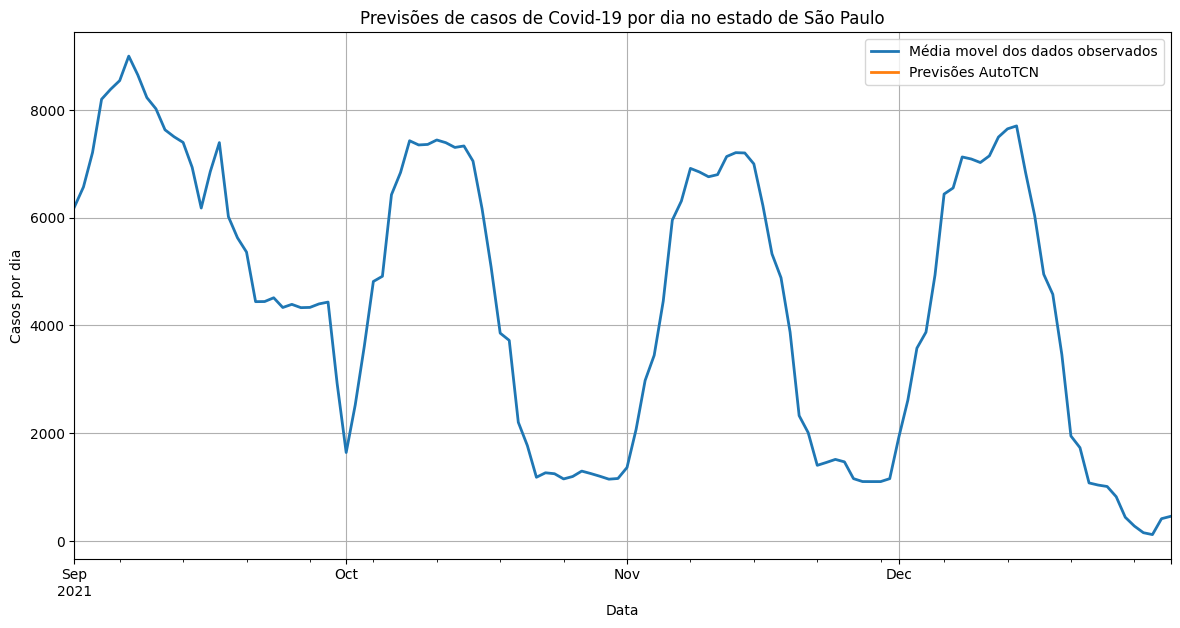

In [ ]:
import matplotlib.pyplot as plt
# Supondo que 'p' contém as previsões
p['ds'] = pd.to_datetime(p['ds'])  # Certifique-se de que a coluna ds é do tipo datetime
p = p.sort_values(by='ds')  # Ordene o DataFrame pelo campo de data ds

# Assuming 'train' and 'p' are your dataframes
fig, ax = plt.subplots(figsize=(1280/96, 720/96))
fig.tight_layout(pad=7.0)

unique_id = 'Estado de SÃ£o Paulo'  # Set the specific ID you want to plot

plot_df = pd.concat([train.loc[train['unique_id'] == unique_id].tail(30),
                     p.loc[p['unique_id'] == unique_id]]).set_index('ds')  # Concatenate the train and forecast dataframes

# Plot the 'y' column with a custom label
plot_df['y'].plot(ax=ax, linewidth=2, label='Média movel dos dados observados')

# Plot the 'AutoTCN' column with a custom label
plot_df['AutoTCN'].plot(ax=ax, linewidth=2, label='Previsões AutoTCN')

# Add legend
ax.legend()

ax.set_title(unique_id)
ax.grid()

# Renomear os eixos
ax.set_xlabel('Data')
ax.set_ylabel('Casos por dia')


# Definir título do gráfico
ax.set_title('Previsões de casos de Covid-19 por dia no estado de São Paulo')

plt.show()


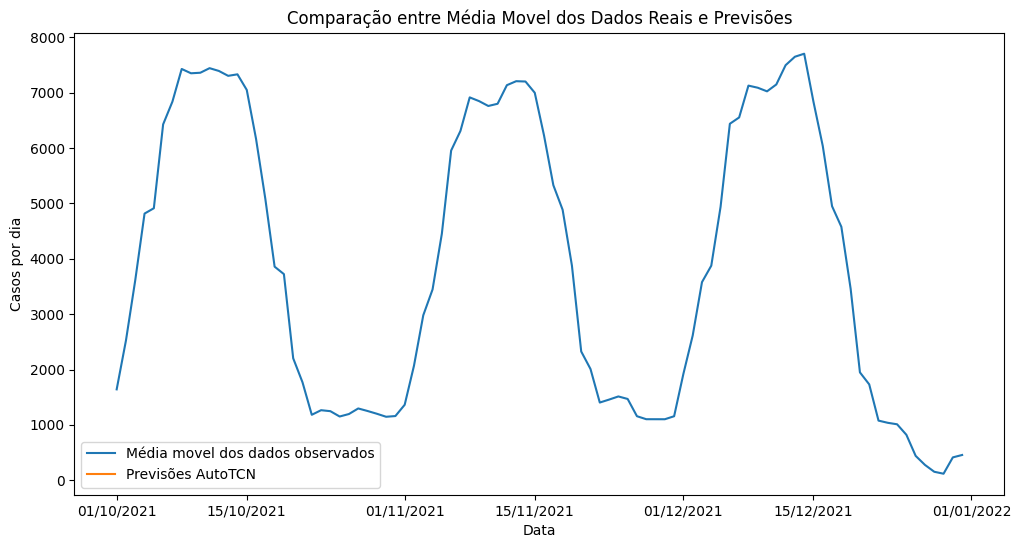

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Supondo que 'p' contém as previsões
p['ds'] = pd.to_datetime(p['ds'])  # Certifique-se de que a coluna ds é do tipo datetime
p = p.sort_values(by='ds')  # Ordene o DataFrame pelo campo de data ds

# Agora, você pode plotar o gráfico sem a linha voltar ao início
plt.figure(figsize=(12, 6))
plt.plot(p['ds'], p['y'], label='Média movel dos dados observados')
plt.plot(p['ds'], p['AutoTCN'], label='Previsões AutoTCN')
plt.title('Comparação entre Média Movel dos Dados Reais e Previsões')
plt.xlabel('Data')
plt.ylabel('Casos por dia')
plt.legend()

# Formatar eixo x para exibir datas no formato 'dd/mm/yyyy'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(p['y'], p['AutoTCN'])
mse = mean_squared_error(p['y'], p['AutoTCN'])
rmse = mean_squared_error(p['y'], p['AutoTCN'], squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

ValueError: ignored